# **Random Forest**
______

Random Forest is a supervised learning model that can be applied to regression and classification. It is an ensemble of decision trees, which means that numerous trees are constructed and their outputs are combined. In this notebook, Random Forest shall be applied to avhieve a supervised model task

## **Objectives of this Notebook**
- Comprehend the basic concept of Random Forest.
- Peform data exploration and visualization
- Explore feature relationships with Random Forest model
- Build Random Forest Model for for Rainfall prediction

______

## **Data Exploration**

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Load Data

In [2]:
df = pd.read_csv('../../weather_data.csv')

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### Listing the columns in the Dataset


In [3]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')

### Checking the Data Per Column

In [4]:
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

### Checking the Data types in each Column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


______

## **Data Cleaning**

We would have to do a bit of cleaning to ensure the data is in the appropriate shape for our model. 

### Correcting the data types of all the columns

The data column data type is not favourable for our model development

In [6]:
# Changing the data type and ensuring the changes

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


### Checking for Duplicates

In [7]:
# Making dure there are no dulicates

duplicates = df.duplicated().sum()
print(f"Duplicates in the dataset: {duplicates}")

Duplicates in the dataset: 0


### Checking for Missing Values

In [8]:
# Checking number of null values per column
df.isnull().sum()

date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

_______

## **Feature Distribution**

In this section, some graphs shall be used to explore the realtionships between columns and features of the dataset that are relevant to our Rainfall prediction model

### **Distribution Plot of Precipitation**

The **histogram** plot will be a perfect graph to display the distribution on the dataset in precipiation. This is relevant to know as this will be a target variable in the model prediction

<Axes: xlabel='precipitation', ylabel='Count'>

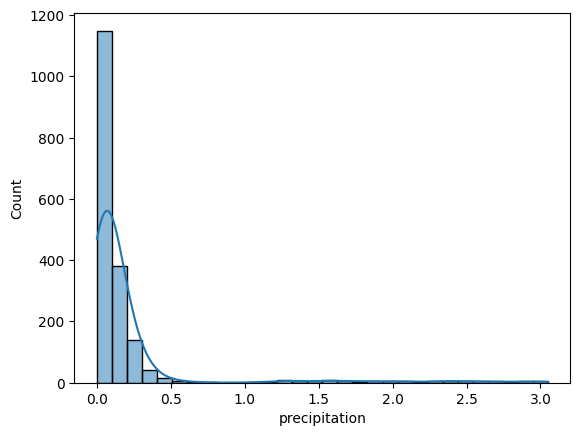

In [9]:
sb.histplot(df['precipitation'], bins=30, kde=True)

**Interpretation on Graph**

The bars show that the frequency decreases as the precipitation value rises, with most of data points having low precipitation values near zero. The smooth curve overlaying the bars represents a probability density function  estimate, which provides a clearer visualization of the distribution pattern.
_____

### **Box Plot of Humidity versus Rainfall**

<Axes: xlabel='rain', ylabel='humidity'>

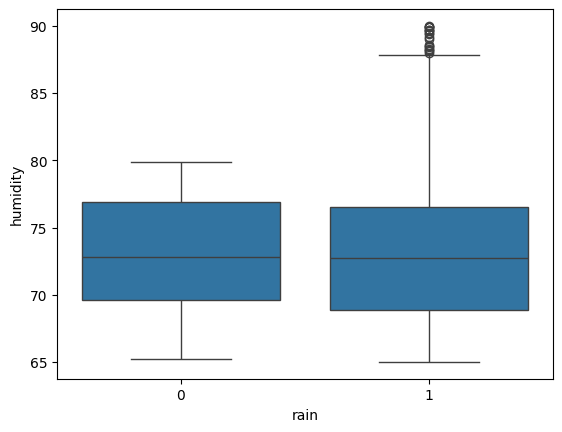

In [10]:
# Let rain be equall to percipitation for the sake of the tasks to identify rain and no rain

df['rain'] = (df['precipitation'] > 0).astype(int)
sb.boxplot(x='rain', y='humidity', data=df)

**Interpretation on Graph**

The boxes show the interquartile range (IQR). Inside each box is a horizontal line that indicates the median.
Outside of the upper and lower quartiles, whiskers can be seen to show the existence of fluctuation.
The exists some outliers in the dataset also.
____

## **Random Forest Model for Rainfall Prediction**

In this section a custom random forest model shall be built . The math and logic behind this supervised learning model shall be explored and used to predict rain fall or no rainfall with the help of the Texas Weather dataset.

### **The Math Behind Random Forest**

### Random Sampling with Replacement

` for i in range(X.shape[1]): for t in thresholds: gain = self._information_gain(y, left, right) `

Each tree is trained on a different random subset of the data. This introduces diversity between trees, helping reduce overfitting.

### Tree Splitting

Each decision tree uses binary splits based on thresholds of features.

` for i in range(X.shape[1]): `

`    for t in thresholds: `

 `               gain = self._information_gain(y, left, right) `




For each feature i, and every unique threshold t, the tree evaluates the information gain:


#### Whereby the Information Gain Formula is:

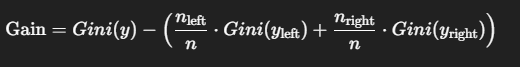


#### Gini Impurity:

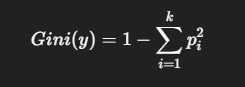

Whereby;

- 𝑝
𝑖
p 
i
​
 : Proportion of class 
𝑖
i in the node.

- Lower Gini = purer node = better split.

### Voting

` tree_preds = [tree.predict(X) for tree in self.trees] `

` y_pred = [most_common(row) for row in zip(*tree_preds)] `

Each tree casts a vote (predicts 0 or 1 for rain). The final prediction is:

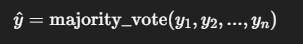

The majority class prevails in what is known as "hard voting."

In actual use, this improves generalization by reducing variation and smoothing out noise.



In [11]:
# Import libraries

from collections import Counter
from sklearn.model_selection import train_test_split

In [12]:
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y))

    def predict(self, X):
        return [self._traverse_tree(x, self.tree) for x in X]

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return leaf_value

        best_feat, best_thresh = self._best_split(X, y)
        if best_feat is None:
            return self._most_common_label(y)

        left_idxs = X[:, best_feat] < best_thresh
        right_idxs = ~left_idxs

        left = self._build_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._build_tree(X[right_idxs], y[right_idxs], depth + 1)
        return (best_feat, best_thresh, left, right)

    def _best_split(self, X, y):
        best_gain = -1
        split_idx, split_thresh = None, None

        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for t in thresholds:
                left = y[X[:, i] < t]
                right = y[X[:, i] >= t]

                if len(left) == 0 or len(right) == 0:
                    continue

                gain = self._information_gain(y, left, right)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = i
                    split_thresh = t
        return split_idx, split_thresh

    def _information_gain(self, parent, left, right):
        weight_l = len(left) / len(parent)
        weight_r = len(right) / len(parent)
        gain = self._gini(parent) - (weight_l * self._gini(left) + weight_r * self._gini(right))
        return gain

    def _gini(self, y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return 1 - np.sum(probs ** 2)

    def _most_common_label(self, y):
        return Counter(y).most_common(1)[0][0]

    def _traverse_tree(self, x, node):
        if not isinstance(node, tuple):
            return node
        feature, threshold, left, right = node
        if x[feature] < threshold:
            return self._traverse_tree(x, left)
        else:
            return self._traverse_tree(x, right)


In [13]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [Counter(row).most_common(1)[0][0] for row in tree_preds]
        return y_pred

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]


In [14]:
# Convert precipitation to binary class: rain or no rain
df['rain'] = (df['precipitation'] > 0).astype(int)

# Select features and target
features = ['max_temp', 'min_temp', 'humidity', 'wind_speed', 'pressure', 'solar_radiation']
X = df[features].values
y = df['rain'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForest(n_trees=5, max_depth=10)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Custom Random Forest Accuracy:", accuracy)


Custom Random Forest Accuracy: 0.9234972677595629


The model has an Accuracy of **93%**, which is pretty good. However let us dive deeper with further evaluations.

### Evaluating the Model with Confusion Matix

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[  0  25]
 [  3 338]]


**Interpretation of Model Evaluation Results**

With just one false negative, the model hardly ever misses real rain.

However, it regularly makes  positive predictions about rain when none actually occurs (25 false positives).

Perhaps as a result of the dataset's imbalance (more wet days than dry ones), it appears to be skewed toward forecasting rain.

_______

## **Conclusion and Final Notes**

In this notebook, a custom Random Forest model was built to predict rainfall using Texas weather data. The coding structure and the mathematical concepts behind Random Forests we looked at which a deeper understandingvof ensemble learning.

### Final Notes

- A custom Decision Tree was built using Gini impurity and information gain to perform splits.

- The Random Forest combined predictions from multiple decision trees trained on bootstrapped datasets, improving generalization and reducing overfitting.

- The final model achieved strong accuracy, with:

    - Very few false negatives ( it rarely missed actual rainfall),

    - But some false positives, indicating a slight bias toward over-predicting rain.